In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_stata('analysis_data.dta')

In [57]:
df.us_rem_all_amntyr

0          0.0
1      20100.0
2       4200.0
3        780.0
4       4300.0
        ...   
986      200.0
987     3650.0
988     2000.0
989     2800.0
990        0.0
Name: us_rem_all_amntyr, Length: 991, dtype: float32

In [4]:
list(df.columns)


['id',
 'treatment_er',
 'treatment_match',
 'weekXlocation',
 'er_number',
 'er_target_student',
 'er_amount_migrant',
 'er_amount_ipa',
 'er_amount_total',
 'er_ts_amount_migrant',
 'er_ts_amount_ipa',
 'er_ts_amount_total',
 'er_sent',
 'us_location',
 'us_location_string',
 'us_date',
 'us_date_string',
 'us_date_day',
 'us_date_month',
 'us_date_year',
 'us_stu_insch',
 'us_stu_edlvl',
 'us_stu_grade',
 'us_stu_edlvl_past',
 'us_stu_grade_past',
 'us_stu_edlvl_all',
 'us_mig_female',
 'us_mig_bday_day',
 'us_mig_bday_month',
 'us_mig_bday_year',
 'us_mig_mrtlstat',
 'us_mig_edlvl',
 'us_mig_grade',
 'us_mig_yearsofed',
 'us_mig_year_US',
 'us_mig_years_inUS',
 'us_mig_chld',
 'us_mig_chld_ES',
 'us_mig_chld_US',
 'us_mig_chld_oth',
 'us_mig_hhsize_b11',
 'us_mig_hhrel_spouse',
 'us_mig_hhrel_son',
 'us_mig_hhrel_daught',
 'us_mig_esrel_spouse',
 'us_mig_esrel_son',
 'us_mig_esrel_daught',
 'us_stu_female',
 'us_stu_mig_rel',
 'us_stu_mig_rel_othspec',
 'us_stu_age',
 'us_rem_reg',

In [5]:
df.us_date_year.unique()

array([2011., 2012.], dtype=float32)

In [6]:
df.id.nunique()

991

In [7]:
df.treatment_er.unique()

array([1., 2., 3.], dtype=float32)

In [8]:
df.treatment_match.unique()

array([0, 2, 1, 3], dtype=int8)

In [9]:
df[df.treatment_match==3]

,id,treatment_er,treatment_match,weekXlocation,er_number,er_target_student,er_amount_migrant,er_amount_ipa,er_amount_total,er_ts_amount_migrant,...,hh2_flag_food_imp1_2,hh2_cost_comp_imp1,hh2_flag_comp_imp1,hh2_flag_comp_imp1_2,hh2_cost_oth_imp1,hh2_flag_oth_imp1,hh2_flag_oth_imp1_2,hh2_cost_imp1,hh2_flag_imp1,hh2_flag_imp1_2
363,200017.0,2.0,3,1.6.5,0,0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,200023.0,2.0,3,1.8.5,0,0,0.0,NaN,0.0,0.0,...,NaN,516.0,NaN,NaN,0.0,NaN,NaN,2224.0,NaN,NaN
367,200026.0,2.0,3,1.6.5,0,0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,200029.0,2.0,3,1.8.5,0,0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,200033.0,2.0,3,1.2.6,0,0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,320196.0,3.0,3,2.3.6,0,0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
978,320199.0,3.0,3,2.3.6,0,0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
980,320201.0,3.0,3,2.3.6,0,0,0.0,NaN,0.0,0.0,...,NaN,215.0,NaN,NaN,0.0,NaN,NaN,1475.0,NaN,NaN
982,320207.0,3.0,3,2.3.6,0,0,0.0,NaN,0.0,0.0,...,NaN,2021.0,NaN,NaN,0.0,NaN,NaN,5209.0,NaN,NaN


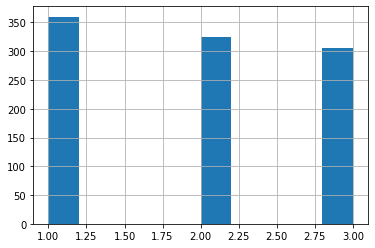

In [10]:
df.treatment_er.hist()

In [11]:
ers = pd.read_stata('ers.dta')

In [12]:
'ertype_2' in df.columns

True

In [13]:
tr_analysis = df[['treatment_er', 'treatment_match', 'match_a', 'match_b', 'match_c']]

- treatment_match = 0 , если группа контрольная
- treatment_match = 1 , если Participant received no match (целевое воздействие 1)
- treatment_match = 2 , если Participant received a $1:$1 match (целевое воздействие 2)
- treatment_match = 3 , если Participant received a $3:$1 match (целевое воздействие 3)

In [14]:
tr_analysis[(tr_analysis.match_b!=0)]

,treatment_er,treatment_match,match_a,match_b,match_c
360,2.0,2,0.0,1.0,0.0
362,2.0,2,0.0,1.0,0.0
364,2.0,2,0.0,1.0,0.0
365,2.0,2,0.0,1.0,0.0
370,2.0,2,0.0,1.0,0.0
...,...,...,...,...,...
981,3.0,2,0.0,1.0,0.0
983,3.0,2,0.0,1.0,0.0
988,3.0,2,0.0,1.0,0.0
989,3.0,2,0.0,1.0,0.0


In [15]:
df.ertype_2.sum()

325.0

In [16]:
df[~df.s_work_any.isna()]

,id,treatment_er,treatment_match,weekXlocation,er_number,er_target_student,er_amount_migrant,er_amount_ipa,er_amount_total,er_ts_amount_migrant,...,hh2_flag_food_imp1_2,hh2_cost_comp_imp1,hh2_flag_comp_imp1,hh2_flag_comp_imp1_2,hh2_cost_oth_imp1,hh2_flag_oth_imp1,hh2_flag_oth_imp1_2,hh2_cost_imp1,hh2_flag_imp1,hh2_flag_imp1_2
1,100026.0,1.0,0,1.2.6,0,0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100035.0,1.0,0,1.8.5,0,0,0.0,NaN,0.0,0.0,...,NaN,301.0,NaN,NaN,0.0,NaN,NaN,1200.0,NaN,NaN
5,100038.0,1.0,0,1.8.5,0,0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,100039.0,1.0,0,1.8.5,0,0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,100040.0,1.0,0,1.8.5,0,0,0.0,NaN,0.0,0.0,...,NaN,645.0,NaN,NaN,0.0,NaN,NaN,3111.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,320209.0,3.0,1,2.3.6,0,0,0.0,NaN,0.0,0.0,...,NaN,215.0,NaN,NaN,0.0,NaN,NaN,2224.0,NaN,NaN
985,320210.0,3.0,1,2.3.6,0,0,0.0,NaN,0.0,0.0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,2095.0,NaN,NaN
986,320211.0,3.0,3,2.3.6,0,0,0.0,NaN,0.0,0.0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
988,320213.0,3.0,2,2.3.6,0,0,0.0,NaN,0.0,0.0,...,NaN,215.0,NaN,NaN,0.0,NaN,NaN,2929.0,NaN,NaN


In [17]:
y_df = df[[
    'id', 'treatment_match', 
    'er_sent', 'er_number', 'er_amount_migrant', 'er_amount_total',
    'er_target_student', 'er_ts_amount_migrant', 'er_ts_amount_total'
]]

In [18]:
y_df

,id,treatment_match,er_sent,er_number,er_amount_migrant,er_amount_total,er_target_student,er_ts_amount_migrant,er_ts_amount_total
0,100025.0,0,0.0,0,0.0,0.0,0,0.0,0.0
1,100026.0,0,0.0,0,0.0,0.0,0,0.0,0.0
2,100031.0,0,0.0,0,0.0,0.0,0,0.0,0.0
3,100035.0,0,0.0,0,0.0,0.0,0,0.0,0.0
4,100036.0,0,0.0,0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
986,320211.0,3,0.0,0,0.0,0.0,0,0.0,0.0
987,320212.0,1,0.0,0,0.0,0.0,0,0.0,0.0
988,320213.0,2,0.0,0,0.0,0.0,0,0.0,0.0
989,320214.0,2,0.0,0,0.0,0.0,0,0.0,0.0


In [19]:
y_df[y_df.er_target_student!= 0]

,id,treatment_match,er_sent,er_number,er_amount_migrant,er_amount_total,er_target_student,er_ts_amount_migrant,er_ts_amount_total
387,200050.0,3,1.0,1,125.0,500.0,1,125.0,500.0
402,200066.0,3,1.0,1,200.0,800.0,1,200.0,800.0
492,210097.0,2,1.0,2,500.0,1000.0,1,250.0,500.0
496,210101.0,3,1.0,1,75.0,300.0,1,75.0,300.0
535,220063.0,3,1.0,1,200.0,800.0,1,200.0,800.0
539,220067.0,2,1.0,1,250.0,500.0,1,250.0,500.0
542,220070.0,3,1.0,1,125.0,500.0,1,125.0,500.0
571,220099.0,3,1.0,1,125.0,500.0,1,125.0,500.0
581,220109.0,2,1.0,2,650.0,1300.0,1,400.0,800.0
591,220119.0,2,1.0,1,300.0,600.0,1,300.0,600.0


In [20]:
y_df[y_df.er_amount_migrant!= 0]

,id,treatment_match,er_sent,er_number,er_amount_migrant,er_amount_total,er_target_student,er_ts_amount_migrant,er_ts_amount_total
379,200041.0,3,1.0,1,125.0,500.0,0,0.0,0.0
387,200050.0,3,1.0,1,125.0,500.0,1,125.0,500.0
402,200066.0,3,1.0,1,200.0,800.0,1,200.0,800.0
455,210058.0,3,1.0,4,500.0,2000.0,0,0.0,0.0
485,210090.0,3,1.0,1,75.0,300.0,0,0.0,0.0
492,210097.0,2,1.0,2,500.0,1000.0,1,250.0,500.0
496,210101.0,3,1.0,1,75.0,300.0,1,75.0,300.0
535,220063.0,3,1.0,1,200.0,800.0,1,200.0,800.0
539,220067.0,2,1.0,1,250.0,500.0,1,250.0,500.0
542,220070.0,3,1.0,1,125.0,500.0,1,125.0,500.0


In [3]:
df['costs'] = df['er_amount_total'] - df['er_amount_migrant']

In [4]:
df

,id,treatment_er,treatment_match,weekXlocation,er_number,er_target_student,er_amount_migrant,er_amount_ipa,er_amount_total,er_ts_amount_migrant,...,hh2_cost_comp_imp1,hh2_flag_comp_imp1,hh2_flag_comp_imp1_2,hh2_cost_oth_imp1,hh2_flag_oth_imp1,hh2_flag_oth_imp1_2,hh2_cost_imp1,hh2_flag_imp1,hh2_flag_imp1_2,costs
0,100025.0,1.0,0,1.2.6,0,0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,100026.0,1.0,0,1.2.6,0,0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,100031.0,1.0,0,1.8.5,0,0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,100035.0,1.0,0,1.8.5,0,0,0.0,NaN,0.0,0.0,...,301.0,NaN,NaN,0.0,NaN,NaN,1200.0,NaN,NaN,0.0
4,100036.0,1.0,0,1.8.5,0,0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,320211.0,3.0,3,2.3.6,0,0,0.0,NaN,0.0,0.0,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
987,320212.0,3.0,1,2.3.6,0,0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
988,320213.0,3.0,2,2.3.6,0,0,0.0,NaN,0.0,0.0,...,215.0,NaN,NaN,0.0,NaN,NaN,2929.0,NaN,NaN,0.0
989,320214.0,3.0,2,2.3.6,0,0,0.0,NaN,0.0,0.0,...,86.0,NaN,NaN,0.0,NaN,NaN,1382.0,NaN,NaN,0.0


In [5]:
df.loc[df['treatment_match'].isin([2, 3]), 'treatment'] = 1
df.loc[df['treatment'].isin([np.nan]), 'treatment'] = 0

In [6]:
df

,id,treatment_er,treatment_match,weekXlocation,er_number,er_target_student,er_amount_migrant,er_amount_ipa,er_amount_total,er_ts_amount_migrant,...,hh2_flag_comp_imp1,hh2_flag_comp_imp1_2,hh2_cost_oth_imp1,hh2_flag_oth_imp1,hh2_flag_oth_imp1_2,hh2_cost_imp1,hh2_flag_imp1,hh2_flag_imp1_2,costs,treatment
0,100025.0,1.0,0,1.2.6,0,0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,100026.0,1.0,0,1.2.6,0,0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,100031.0,1.0,0,1.8.5,0,0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,100035.0,1.0,0,1.8.5,0,0,0.0,NaN,0.0,0.0,...,NaN,NaN,0.0,NaN,NaN,1200.0,NaN,NaN,0.0,0.0
4,100036.0,1.0,0,1.8.5,0,0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,320211.0,3.0,3,2.3.6,0,0,0.0,NaN,0.0,0.0,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,1.0
987,320212.0,3.0,1,2.3.6,0,0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
988,320213.0,3.0,2,2.3.6,0,0,0.0,NaN,0.0,0.0,...,NaN,NaN,0.0,NaN,NaN,2929.0,NaN,NaN,0.0,1.0
989,320214.0,3.0,2,2.3.6,0,0,0.0,NaN,0.0,0.0,...,NaN,NaN,0.0,NaN,NaN,1382.0,NaN,NaN,0.0,1.0


- treatment - treatment
- costs - издержки (дополнительно выплаченные деньги от EduRemsa)
- er_amount_total - эффект (количество перечисленных денег на образование студентов)
- dayXlocation - условно , можно взять регион

In [7]:
cols_covar = [
    'id', 'treatment', 'costs', 'er_amount_total', 'dayXlocation', 'us_rem_all_amntyr'
] + [i for i in df.columns if i.startswith('us_stu')]

In [8]:
df[cols_covar]

,id,treatment,costs,er_amount_total,dayXlocation,us_rem_all_amntyr,us_stu_insch,us_stu_edlvl,us_stu_grade,us_stu_edlvl_past,...,us_stu_female,us_stu_mig_rel,us_stu_mig_rel_othspec,us_stu_age,us_stu_grade_all,us_stu_yearsofed,us_stu_mig_rel_child,us_stu_mig_rel_sib,us_stu_mig_rel_niece,us_stu_mig_rel_cousin
0,100025.0,0.0,0.0,0.0,1.18945,0.0,1_Yes,5_University,NaN,NaN,...,1_Female,5_Cousin,,25.0,NaN,NaN,0.0,0.0,0.0,1.0
1,100026.0,0.0,0.0,0.0,1.18945,20100.0,1_Yes,4_High School,13.0,NaN,...,1_Female,2_Sibling,,18.0,13.0,13.0,0.0,1.0,0.0,0.0
2,100031.0,0.0,0.0,0.0,1.18961,4200.0,1_Yes,3_Elem and Middle,9.0,NaN,...,1_Female,5_Cousin,,14.0,9.0,9.0,0.0,0.0,0.0,1.0
3,100035.0,0.0,0.0,0.0,1.18961,780.0,1_Yes,3_Elem and Middle,9.0,NaN,...,0_Male,5_Cousin,,17.0,9.0,9.0,0.0,0.0,0.0,1.0
4,100036.0,0.0,0.0,0.0,1.18961,4300.0,1_Yes,5_University,NaN,NaN,...,0_Male,5_Cousin,,22.0,NaN,NaN,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,320211.0,1.0,0.0,0.0,2.19020,200.0,1_Yes,5_University,2.0,NaN,...,0_Male,4_Niece/nephew,,23.0,2.0,14.0,0.0,0.0,1.0,0.0
987,320212.0,0.0,0.0,0.0,2.19020,3650.0,1_Yes,4_High School,10.0,NaN,...,0_Male,10_Other,,15.0,10.0,10.0,0.0,0.0,0.0,0.0
988,320213.0,1.0,0.0,0.0,2.19020,2000.0,1_Yes,5_University,3.0,NaN,...,0_Male,8_Sibling-in-law,,22.0,3.0,15.0,0.0,0.0,0.0,0.0
989,320214.0,1.0,0.0,0.0,2.19020,2800.0,1_Yes,4_High School,13.0,NaN,...,1_Female,2_Sibling,,19.0,13.0,13.0,0.0,1.0,0.0,0.0


In [9]:
cols_covar.remove('us_stu_edlvl_past')
cols_covar.remove('us_stu_grade_past')
cols_covar.remove('us_stu_mig_rel_othspec')

In [10]:
df[cols_covar].isna().sum()

id                         0
treatment                  0
costs                      0
er_amount_total            0
dayXlocation               0
us_rem_all_amntyr         17
us_stu_insch               1
us_stu_edlvl             114
us_stu_grade             133
us_stu_edlvl_all          33
us_stu_female              0
us_stu_mig_rel             2
us_stu_age                24
us_stu_grade_all          55
us_stu_yearsofed          78
us_stu_mig_rel_child       2
us_stu_mig_rel_sib         2
us_stu_mig_rel_niece       2
us_stu_mig_rel_cousin      2
dtype: int64

In [11]:
pre_final = df[cols_covar].dropna().astype({
    'us_stu_insch': str,
    'us_stu_edlvl': str,
    'us_stu_female': str,
    'us_stu_mig_rel': str
})

In [12]:
for col in ['us_stu_insch', 'us_stu_edlvl', 'us_stu_female', 'us_stu_mig_rel']:
    pre_final[col] = pre_final[col].map(lambda x: x[0])

In [13]:
pre_final

,id,treatment,costs,er_amount_total,dayXlocation,us_rem_all_amntyr,us_stu_insch,us_stu_edlvl,us_stu_grade,us_stu_edlvl_all,us_stu_female,us_stu_mig_rel,us_stu_age,us_stu_grade_all,us_stu_yearsofed,us_stu_mig_rel_child,us_stu_mig_rel_sib,us_stu_mig_rel_niece,us_stu_mig_rel_cousin
1,100026.0,0.0,0.0,0.0,1.18945,20100.0,1,4,13.0,4.0,1,2,18.0,13.0,13.0,0.0,1.0,0.0,0.0
2,100031.0,0.0,0.0,0.0,1.18961,4200.0,1,3,9.0,3.0,1,5,14.0,9.0,9.0,0.0,0.0,0.0,1.0
3,100035.0,0.0,0.0,0.0,1.18961,780.0,1,3,9.0,3.0,0,5,17.0,9.0,9.0,0.0,0.0,0.0,1.0
5,100038.0,0.0,0.0,0.0,1.18961,0.0,1,4,11.0,4.0,0,9,18.0,11.0,11.0,0.0,0.0,0.0,0.0
7,100040.0,0.0,0.0,0.0,1.18961,0.0,1,5,2.0,5.0,0,5,18.0,2.0,14.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,320211.0,1.0,0.0,0.0,2.19020,200.0,1,5,2.0,5.0,0,4,23.0,2.0,14.0,0.0,0.0,1.0,0.0
987,320212.0,0.0,0.0,0.0,2.19020,3650.0,1,4,10.0,4.0,0,1,15.0,10.0,10.0,0.0,0.0,0.0,0.0
988,320213.0,1.0,0.0,0.0,2.19020,2000.0,1,5,3.0,5.0,0,8,22.0,3.0,15.0,0.0,0.0,0.0,0.0
989,320214.0,1.0,0.0,0.0,2.19020,2800.0,1,4,13.0,4.0,1,2,19.0,13.0,13.0,0.0,1.0,0.0,0.0


In [14]:
pre_final.dtypes

id                       float64
treatment                float64
costs                    float64
er_amount_total          float64
dayXlocation              object
us_rem_all_amntyr        float32
us_stu_insch              object
us_stu_edlvl              object
us_stu_grade             float64
us_stu_edlvl_all         float32
us_stu_female             object
us_stu_mig_rel            object
us_stu_age               float64
us_stu_grade_all         float32
us_stu_yearsofed         float32
us_stu_mig_rel_child     float32
us_stu_mig_rel_sib       float32
us_stu_mig_rel_niece     float32
us_stu_mig_rel_cousin    float32
dtype: object

In [15]:
final = pre_final.astype({
    'dayXlocation': float,
    'us_stu_insch': float,
    'us_stu_edlvl': float,
    'us_stu_female': float,
    'us_stu_mig_rel': float
})

In [16]:
final

,id,treatment,costs,er_amount_total,dayXlocation,us_rem_all_amntyr,us_stu_insch,us_stu_edlvl,us_stu_grade,us_stu_edlvl_all,us_stu_female,us_stu_mig_rel,us_stu_age,us_stu_grade_all,us_stu_yearsofed,us_stu_mig_rel_child,us_stu_mig_rel_sib,us_stu_mig_rel_niece,us_stu_mig_rel_cousin
1,100026.0,0.0,0.0,0.0,1.18945,20100.0,1.0,4.0,13.0,4.0,1.0,2.0,18.0,13.0,13.0,0.0,1.0,0.0,0.0
2,100031.0,0.0,0.0,0.0,1.18961,4200.0,1.0,3.0,9.0,3.0,1.0,5.0,14.0,9.0,9.0,0.0,0.0,0.0,1.0
3,100035.0,0.0,0.0,0.0,1.18961,780.0,1.0,3.0,9.0,3.0,0.0,5.0,17.0,9.0,9.0,0.0,0.0,0.0,1.0
5,100038.0,0.0,0.0,0.0,1.18961,0.0,1.0,4.0,11.0,4.0,0.0,9.0,18.0,11.0,11.0,0.0,0.0,0.0,0.0
7,100040.0,0.0,0.0,0.0,1.18961,0.0,1.0,5.0,2.0,5.0,0.0,5.0,18.0,2.0,14.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,320211.0,1.0,0.0,0.0,2.19020,200.0,1.0,5.0,2.0,5.0,0.0,4.0,23.0,2.0,14.0,0.0,0.0,1.0,0.0
987,320212.0,0.0,0.0,0.0,2.19020,3650.0,1.0,4.0,10.0,4.0,0.0,1.0,15.0,10.0,10.0,0.0,0.0,0.0,0.0
988,320213.0,1.0,0.0,0.0,2.19020,2000.0,1.0,5.0,3.0,5.0,0.0,8.0,22.0,3.0,15.0,0.0,0.0,0.0,0.0
989,320214.0,1.0,0.0,0.0,2.19020,2800.0,1.0,4.0,13.0,4.0,1.0,2.0,19.0,13.0,13.0,0.0,1.0,0.0,0.0


In [138]:
final.to_csv('Ambler_data.csv', index=False)

In [139]:
pwd

'/Users/dianamirzoyan/Desktop/Diana/DISSERTATION/data/Ambler/Remittances Dataverse Files/data'

In [140]:
final.columns

Index(['id', 'treatment', 'costs', 'er_amount_total', 'dayXlocation',
       'us_stu_insch', 'us_stu_edlvl', 'us_stu_grade', 'us_stu_edlvl_all',
       'us_stu_female', 'us_stu_mig_rel', 'us_stu_age', 'us_stu_grade_all',
       'us_stu_yearsofed', 'us_stu_mig_rel_child', 'us_stu_mig_rel_sib',
       'us_stu_mig_rel_niece', 'us_stu_mig_rel_cousin'],
      dtype='object')

In [141]:
final[final.treatment!=0]

,id,treatment,costs,er_amount_total,dayXlocation,us_stu_insch,us_stu_edlvl,us_stu_grade,us_stu_edlvl_all,us_stu_female,us_stu_mig_rel,us_stu_age,us_stu_grade_all,us_stu_yearsofed,us_stu_mig_rel_child,us_stu_mig_rel_sib,us_stu_mig_rel_niece,us_stu_mig_rel_cousin
360,200008.0,1.0,0.0,0.0,1.18941,1.0,4.0,11.0,4.0,0.0,2.0,20.0,11.0,11.0,0.0,1.0,0.0,0.0
362,200010.0,1.0,0.0,0.0,1.18941,1.0,4.0,13.0,4.0,0.0,1.0,18.0,13.0,13.0,1.0,0.0,0.0,0.0
363,200017.0,1.0,0.0,0.0,1.18941,1.0,4.0,10.0,4.0,1.0,5.0,15.0,10.0,10.0,0.0,0.0,0.0,1.0
365,200022.0,1.0,0.0,0.0,1.18949,1.0,4.0,11.0,4.0,1.0,4.0,15.0,11.0,11.0,0.0,0.0,1.0,0.0
367,200026.0,1.0,0.0,0.0,1.18941,1.0,3.0,9.0,3.0,1.0,1.0,15.0,9.0,9.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,320208.0,1.0,0.0,0.0,2.19020,1.0,4.0,10.0,4.0,0.0,4.0,19.0,10.0,10.0,0.0,0.0,1.0,0.0
986,320211.0,1.0,0.0,0.0,2.19020,1.0,5.0,2.0,5.0,0.0,4.0,23.0,2.0,14.0,0.0,0.0,1.0,0.0
988,320213.0,1.0,0.0,0.0,2.19020,1.0,5.0,3.0,5.0,0.0,8.0,22.0,3.0,15.0,0.0,0.0,0.0,0.0
989,320214.0,1.0,0.0,0.0,2.19020,1.0,4.0,13.0,4.0,1.0,2.0,19.0,13.0,13.0,0.0,1.0,0.0,0.0


In [143]:
df[df['treatment_match'].isin([1])].er_amount_total.nunique()

1

In [146]:
df.er_amount_total.unique()

array([   0.,  500.,  800., 2000.,  300., 1000., 1300.,  600.,  900.,
       1100., 2400.])

In [163]:
for col in y_df.columns[2:]:
    print(y_df[y_df['treatment_match'].isin([0])][col].unique())

[0.]
[0]
[0.]
[0.]
[0]
[0.]
[0.]


In [148]:
y_df.columns

Index(['id', 'treatment_match', 'er_sent', 'er_number', 'er_amount_migrant',
       'er_amount_total', 'er_target_student', 'er_ts_amount_migrant',
       'er_ts_amount_total'],
      dtype='object')

In [166]:
y_df.groupby('treatment_match').agg({
    'er_sent': 'mean',
    'er_number': 'mean', 
    'er_amount_migrant': 'mean',
    'er_amount_total': 'mean',
})

,er_sent,er_number,er_amount_migrant,er_amount_total
treatment_match,,,,
0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.049261,0.059113,16.379310,33.990148
3,0.142857,0.184332,25.691244,102.764977


In [17]:
cols_covar_ = [
    'id', 'treatment_match', 'costs', 'er_amount_total', 'dayXlocation', 'us_rem_all_amntyr'
] + [i for i in df.columns if i.startswith('us_stu')]

In [18]:
cols_covar_.remove('us_stu_edlvl_past')
cols_covar_.remove('us_stu_grade_past')
cols_covar_.remove('us_stu_mig_rel_othspec')

In [19]:
pre_final_ = df[cols_covar_].dropna().astype({
    'us_stu_insch': str,
    'us_stu_edlvl': str,
    'us_stu_female': str,
    'us_stu_mig_rel': str
})

In [20]:
for col in ['us_stu_insch', 'us_stu_edlvl', 'us_stu_female', 'us_stu_mig_rel']:
    pre_final_[col] = pre_final_[col].map(lambda x: x[0])

In [35]:
final_ = pre_final_.astype({
    'dayXlocation': float,
    'us_stu_insch': float,
    'us_stu_edlvl': float,
    'us_stu_female': float,
    'us_stu_mig_rel': float
})

In [36]:
final_

,id,treatment_match,costs,er_amount_total,dayXlocation,us_rem_all_amntyr,us_stu_insch,us_stu_edlvl,us_stu_grade,us_stu_edlvl_all,us_stu_female,us_stu_mig_rel,us_stu_age,us_stu_grade_all,us_stu_yearsofed,us_stu_mig_rel_child,us_stu_mig_rel_sib,us_stu_mig_rel_niece,us_stu_mig_rel_cousin
1,100026.0,0,0.0,0.0,1.18945,20100.0,1.0,4.0,13.0,4.0,1.0,2.0,18.0,13.0,13.0,0.0,1.0,0.0,0.0
2,100031.0,0,0.0,0.0,1.18961,4200.0,1.0,3.0,9.0,3.0,1.0,5.0,14.0,9.0,9.0,0.0,0.0,0.0,1.0
3,100035.0,0,0.0,0.0,1.18961,780.0,1.0,3.0,9.0,3.0,0.0,5.0,17.0,9.0,9.0,0.0,0.0,0.0,1.0
5,100038.0,0,0.0,0.0,1.18961,0.0,1.0,4.0,11.0,4.0,0.0,9.0,18.0,11.0,11.0,0.0,0.0,0.0,0.0
7,100040.0,0,0.0,0.0,1.18961,0.0,1.0,5.0,2.0,5.0,0.0,5.0,18.0,2.0,14.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,320211.0,3,0.0,0.0,2.19020,200.0,1.0,5.0,2.0,5.0,0.0,4.0,23.0,2.0,14.0,0.0,0.0,1.0,0.0
987,320212.0,1,0.0,0.0,2.19020,3650.0,1.0,4.0,10.0,4.0,0.0,1.0,15.0,10.0,10.0,0.0,0.0,0.0,0.0
988,320213.0,2,0.0,0.0,2.19020,2000.0,1.0,5.0,3.0,5.0,0.0,8.0,22.0,3.0,15.0,0.0,0.0,0.0,0.0
989,320214.0,2,0.0,0.0,2.19020,2800.0,1.0,4.0,13.0,4.0,1.0,2.0,19.0,13.0,13.0,0.0,1.0,0.0,0.0


In [37]:
final_.treatment_match.unique()

array([0, 2, 3, 1], dtype=int8)

In [38]:
final_.loc[final_['treatment_match'].isin([3]), 'treatment_tmp1'] = 1
final_.loc[final_['treatment_tmp1'].isin([np.nan]), 'treatment_tmp1'] = 0

In [39]:
final_.loc[final_['treatment_match'].isin([3]), 'treatment_tmp2'] = 1
final_.loc[final_['treatment_match'].isin([2]), 'treatment_tmp2'] = 0

In [42]:
final__ = final_.dropna()

In [55]:
final__

,id,treatment_match,costs,er_amount_total,dayXlocation,us_rem_all_amntyr,us_stu_insch,us_stu_edlvl,us_stu_grade,us_stu_edlvl_all,...,us_stu_mig_rel,us_stu_age,us_stu_grade_all,us_stu_yearsofed,us_stu_mig_rel_child,us_stu_mig_rel_sib,us_stu_mig_rel_niece,us_stu_mig_rel_cousin,treatment_tmp1,treatment_tmp2
360,200008.0,2,0.0,0.0,1.18941,830.0,1.0,4.0,11.0,4.0,...,2.0,20.0,11.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0
362,200010.0,2,0.0,0.0,1.18941,6200.0,1.0,4.0,13.0,4.0,...,1.0,18.0,13.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0
363,200017.0,3,0.0,0.0,1.18941,450.0,1.0,4.0,10.0,4.0,...,5.0,15.0,10.0,10.0,0.0,0.0,0.0,1.0,1.0,1.0
365,200022.0,2,0.0,0.0,1.18949,5900.0,1.0,4.0,11.0,4.0,...,4.0,15.0,11.0,11.0,0.0,0.0,1.0,0.0,0.0,0.0
367,200026.0,3,0.0,0.0,1.18941,10490.0,1.0,3.0,9.0,3.0,...,1.0,15.0,9.0,9.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,320208.0,2,0.0,0.0,2.19020,600.0,1.0,4.0,10.0,4.0,...,4.0,19.0,10.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0
986,320211.0,3,0.0,0.0,2.19020,200.0,1.0,5.0,2.0,5.0,...,4.0,23.0,2.0,14.0,0.0,0.0,1.0,0.0,1.0,1.0
988,320213.0,2,0.0,0.0,2.19020,2000.0,1.0,5.0,3.0,5.0,...,8.0,22.0,3.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0
989,320214.0,2,0.0,0.0,2.19020,2800.0,1.0,4.0,13.0,4.0,...,2.0,19.0,13.0,13.0,0.0,1.0,0.0,0.0,0.0,0.0


In [58]:
(
    final__[final__.treatment_tmp2==1].er_amount_total.mean() - final__[final__.treatment_tmp2==0].er_amount_total.mean()
)/(final__[final__.treatment_tmp2==1].costs.mean() - final__[final__.treatment_tmp2==0].costs.mean()) 


1.2024767514668029

In [59]:
1.2024767514668029/final__.er_amount_total.max()

0.0005010319797778346

In [57]:
final__.costs.max()

1800.0

In [53]:
final__.us_stu_female

360    0.0
362    0.0
363    1.0
365    1.0
367    1.0
      ... 
983    0.0
986    0.0
988    0.0
989    1.0
990    0.0
Name: us_stu_female, Length: 349, dtype: float64

In [50]:
final__[final__.treatment_tmp2==0].us_rem_all_amntyr

360     830.0
362    6200.0
365    5900.0
370    3750.0
372     300.0
        ...  
981     750.0
983     600.0
988    2000.0
989    2800.0
990       0.0
Name: us_rem_all_amntyr, Length: 165, dtype: float32

In [47]:
final__.er_amount_total.max(), final__.er_amount_total.min()

(2400.0, 0.0)

In [48]:
final__.costs.max(), final__.costs.min()

(1800.0, 0.0)

In [51]:
from scipy import stats
print(
    stats.ks_2samp(
        final__[final__.treatment_tmp2==0].us_rem_all_amntyr,
        final__[final__.treatment_tmp2==1].us_rem_all_amntyr
    )
)
stats.ttest_ind(
    final__[final__.treatment_tmp2==0].us_rem_all_amntyr,
    final__[final__.treatment_tmp2==1].us_rem_all_amntyr, 
    nan_policy='omit'
)

Ks_2sampResult(statistic=0.02865612648221344, pvalue=0.9999966381811074)


Ttest_indResult(statistic=-0.7143919599643249, pvalue=0.4754651313595515)

In [52]:
print(
    stats.ks_2samp(
        final__[final__.treatment_tmp2==0].us_stu_age,
        final__[final__.treatment_tmp2==1].us_stu_age
    )
)
stats.ttest_ind(
    final__[final__.treatment_tmp2==0].us_stu_age,
    final__[final__.treatment_tmp2==1].us_stu_age, 
    nan_policy='omit'
)

Ks_2sampResult(statistic=0.07282608695652174, pvalue=0.7078328022757212)


Ttest_indResult(statistic=0.09150263120811303, pvalue=0.9271460150369311)

In [ ]:
print(
    stats.ks_2samp(
        final__[final__.treatment_tmp2==0].us_stu_age,
        final__[final__.treatment_tmp2==1].us_stu_age
    )
)
stats.ttest_ind(
    final__[final__.treatment_tmp2==0].us_stu_age,
    final__[final__.treatment_tmp2==1].us_stu_age, 
    nan_policy='omit'
)

In [54]:
print(
    stats.ks_2samp(
        final__[final__.treatment_tmp2==0].us_stu_female,
        final__[final__.treatment_tmp2==1].us_stu_female
    )
)
stats.ttest_ind(
    final__[final__.treatment_tmp2==0].us_stu_female,
    final__[final__.treatment_tmp2==1].us_stu_female, 
    nan_policy='omit'
)

Ks_2sampResult(statistic=0.004084321475625824, pvalue=1.0)


Ttest_indResult(statistic=0.07623392531095483, pvalue=0.9392769262253147)

In [ ]:
# final_.loc[final_['treatment_match'].isin([2, 3]), 'treatment_tmp2'] = 1
# final_.loc[final_['treatment_tmp2'].isin([np.nan]), 'treatment_tmp2'] = 0

In [180]:
final_.to_csv('Ambler_data_upd.csv', index=False)

In [48]:
final_[final_.treatment_tmp2.isin([np.nan])]

,id,treatment_match,costs,er_amount_total,dayXlocation,us_stu_insch,us_stu_edlvl,us_stu_grade,us_stu_edlvl_all,us_stu_female,us_stu_mig_rel,us_stu_age,us_stu_grade_all,us_stu_yearsofed,us_stu_mig_rel_child,us_stu_mig_rel_sib,us_stu_mig_rel_niece,us_stu_mig_rel_cousin,treatment_tmp1,treatment_tmp2
1,100026.0,0,0.0,0.0,1.18945,1.0,4.0,13.0,4.0,1.0,2.0,18.0,13.0,13.0,0.0,1.0,0.0,0.0,0.0,NaN
2,100031.0,0,0.0,0.0,1.18961,1.0,3.0,9.0,3.0,1.0,5.0,14.0,9.0,9.0,0.0,0.0,0.0,1.0,0.0,NaN
3,100035.0,0,0.0,0.0,1.18961,1.0,3.0,9.0,3.0,0.0,5.0,17.0,9.0,9.0,0.0,0.0,0.0,1.0,0.0,NaN
5,100038.0,0,0.0,0.0,1.18961,1.0,4.0,11.0,4.0,0.0,9.0,18.0,11.0,11.0,0.0,0.0,0.0,0.0,0.0,NaN
7,100040.0,0,0.0,0.0,1.18961,1.0,5.0,2.0,5.0,0.0,5.0,18.0,2.0,14.0,0.0,0.0,0.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,320195.0,1,0.0,0.0,2.19025,1.0,4.0,10.0,4.0,0.0,4.0,16.0,10.0,10.0,0.0,0.0,1.0,0.0,0.0,NaN
976,320197.0,1,0.0,0.0,2.19020,1.0,5.0,1.0,5.0,0.0,4.0,18.0,1.0,13.0,0.0,0.0,1.0,0.0,0.0,NaN
979,320200.0,1,0.0,0.0,2.19020,1.0,5.0,1.0,5.0,1.0,2.0,21.0,1.0,13.0,0.0,1.0,0.0,0.0,0.0,NaN
984,320209.0,1,0.0,0.0,2.19020,1.0,5.0,2.0,5.0,0.0,2.0,20.0,2.0,14.0,0.0,1.0,0.0,0.0,0.0,NaN


In [49]:
final_.shape

(824, 20)